
<img src="nui-galway.jpg" alt="NUI Galway Image" height="400" width="520">

<b><h1><center>MS5114 Advanced Programming for Business Analytics<br><br>
Assignment 4</b></h1></center>
<br>
# <center>Title: Customer Churn Prediction In Telecom Industry <br>Using Machine Learning Algorithms In Python.</center>
<br>
<center><h4>Submitted By: Group 15</h4>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-akik{font-weight:bold;font-size:26px;font-family:"Lucida Console", Monaco, monospace !important;;text-align:left;vertical-align:top}
.tg .tg-owgb{font-size:26px;font-family:"Lucida Console", Monaco, monospace !important;;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-akik">Student ID</th>
    <th class="tg-akik">Student Name</th>
  </tr>
  <tr>
    <td class="tg-owgb">19230318</td>
    <td class="tg-owgb">Smruti Subhash Chikali</td>
  </tr>
  <tr>
    <td class="tg-owgb">19230227</td>
    <td class="tg-owgb">Tanvi Sawant</td>
  </tr>
  <tr>
    <td class="tg-owgb">19230420</td>
    <td class="tg-owgb">Sourav Pal</td>
  </tr>
  <tr>
    <td class="tg-owgb">19230559</td>
    <td class="tg-owgb">Saurabh Nagpal</td>
  </tr>
</table></h2></center>

In [33]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

hr{ 
  height: 5px;
  color: black;
  background-color: red;
  border: none;
}
</style>

### Importing required libraries

In [34]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mtick
    import seaborn as sns
    from sklearn import svm
    %matplotlib inline
    from IPython.core.display import display, HTML
    import ipywidgets as ipyw

### Reading data
The Telco Customer Churn data is obtained from Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn#__sid=js0

In [35]:
def data_reading():
        try:
            data = pd.read_csv('Wa_Fn-UseC_-Telco-Customer-Churn.csv', encoding='latin1')
            display(HTML('</br><h1><center> Initial Raw Data </center></h1></br>'))
            display(data.head())
            return data
        except FileNotFoundError:
            print('\nFile not found exception occured while reading the data. Kindly check the location or name of the file!')
            return

### Data pre-processing

In [36]:
def data_cleaning(data):

        # Replacing null values with NaN
        data = data.replace(' ', np.nan)

        # Droping all the null values 
        data = data.dropna()
        
        # Converting 'TotalCharges' into float
        data['TotalCharges'] = data['TotalCharges'].astype(float)

        # Assigning continuous values to the column SeniorCitizen
        senior_mapping = {0: "No", 1: "Yes"}
        data['SeniorCitizen'] = data['SeniorCitizen'].map(senior_mapping)

        display(HTML('</br><h1><center> Processed Cleaned Data </center></h1></br>'))
        display(data.head())

        return data

### Statistical Analysis

In [37]:
def stat_analysis(data):
    display(HTML('<hr class="new1">'))
    
    # Correlation Matrix of Tenure, Monthly Charges, and Total Charges
    display(HTML('</br><h1><center> Correlation between the numerical columns of the data </center></h1></br>'))
    display(data.corr())
    
    # Box plots to check for outliers
    display(HTML('</br><h1><center> Outlier Detection </center></h1></br>'))
    fig, axes = plt.subplots(1,3, figsize=(10,6))
    sns.boxplot(data=data['tenure'], orient='v', ax=axes[0])
    sns.boxplot(data=data['MonthlyCharges'], orient='v', ax=axes[1], color='red')
    sns.boxplot(data=data['TotalCharges'], orient='v', ax=axes[2], color='green')
    plt.tight_layout()
    axes[0].set_title('Tenure')
    axes[1].set_title('Monthly Charges')
    axes[2].set_title('Total Charges')
    plt.show()
    

### Histograms

In [38]:
def show_plots(data):
    
    display(HTML('<hr class="new1">'))
    
    # Histogram using Seaborn (Tenure)
    display(HTML('</br><h1><center> Histogram of Tenure </center></h1></br>'))
    plt.figure(figsize=(12,6))
    sns.set_style('whitegrid')
    sns.distplot(data['tenure'], bins=35, kde=False)
    plt.title('Histogram of Tenure')
    plt.show()

    # Histogram using Seaborn (Monthly Bills)
    display(HTML('</br><h1><center> Cost of Monthly Bills </center></h1></br>'))    
    plt.figure(figsize=(12,6))
    sns.set_style('whitegrid')
    sns.distplot(data['MonthlyCharges'], bins=35, kde=False, color='red')
    plt.title('Histogram of Monthly Bills')
    plt.show()

    # Histogram using Seaborn (Total bills)
    display(HTML('</br><h1><center> Total Bill </center></h1></br>'))
    plt.figure(figsize=(12,6))
    sns.set_style('whitegrid')
    sns.distplot(data['TotalCharges'], bins=35, kde=False, color='green')
    plt.title('Histogram of Total Charges')
    plt.show()


### Descriptive Analysis

In [39]:
def churn_analysis_plots(data):
        
    display(HTML('<hr class="new1">'))
    
    # Count plot of total churned out cutomers
    display(HTML('</br><h1><center> Churn Status </center></h1></br>'))
    plt.figure(figsize=(10,6))
    sns.countplot(x='Churn', data=data, palette='viridis')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Did the Customers leave?', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Churn Status ', fontsize=16)
    plt.show()
    
    # Count Plot displaying gender wise churned out customers
    display(HTML('</br><h1><center> Churn Status per Gender </center></h1></br>'))
    sns.set_style('darkgrid')
    gender_churn_grp = data.groupby(['gender', 'Churn']).size().reset_index().pivot(columns='Churn', index='gender', values=0)
    fig1 = gender_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6),
                          colormap = 'viridis', 
                          rot = 0)
    fig1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['gender'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status per Gender', fontsize=16)
    plt.show()

    # Bar plot for Churn Status per Citizen type using matplotlib
    display(HTML('</br><h1><center> Churn Status per Citizen Type </center></h1></br>'))    
    SeniorCitizen_churn_grp = data.groupby(['SeniorCitizen', 'Churn']).size().reset_index().pivot(columns='Churn', index='SeniorCitizen', values=0)
    sns.set_style('darkgrid')
    fig2 = SeniorCitizen_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6),
                                        colormap = 'coolwarm', 
                                        rot = 0)
    fig2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['SeniorCitizen'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(np.arange(2), ('Young', 'Senior'), fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status per Citizen Type', fontsize=16)
    plt.show()

    # Bar plot for Churn Status per Partnership type using matplotlib
    display(HTML('</br><h1><center> Churn Status for Partnered Vs. Non-Partnered Customers </center></h1></br>'))
    partner_churn_grp = data.groupby(['Partner', 'Churn']).size().reset_index().pivot(columns='Churn', index='Partner', values=0)
    sns.set_style('darkgrid')
    fig3 = partner_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6),
                                  colormap = 'Spectral', 
                                  rot = 0)
    fig3.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['Partner'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(np.arange(2), ('Non-Partner', 'Partner'), fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status for Partnered Vs. Non-Partnered Customers', fontsize=16)
    plt.show()

    # Bar plot for Churn Status per Dependency type using matplotlib
    display(HTML('</br><h1><center> Churn Status for Dependent Vs. Non-Dependent Customers </center></h1></br>'))
    dependents_churn_grp = data.groupby(['Dependents', 'Churn']).size().reset_index().pivot(columns='Churn', index='Dependents', values=0)
    sns.set_style('darkgrid')
    fig4 = dependents_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6), 
                                     colormap = 'PiYG', 
                                     rot = 0)
    fig4.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['Dependents'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(np.arange(2), ('Non-Dependent', 'Dependent'), fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status for Dependent Vs. Non-Dependent Customers', fontsize=16)
    plt.show()

    # Bar plot for Churn Status per Phone Service type using matplotlib
    display(HTML('</br><h1><center> Churn Status for Phone Service Vs. No Phone Service Customers </center></h1></br>'))
    PhoneService_churn_grp = data.groupby(['PhoneService', 'Churn']).size().reset_index().pivot(columns='Churn', index='PhoneService', values=0)
    sns.set_style('darkgrid')
    fig5 = PhoneService_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6),
                                       colormap = 'Accent', 
                                       rot = 0)
    fig5.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['PhoneService'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(np.arange(2), ('No Phone Service', 'Phone Service'), fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status for Phone Service Vs. No Phone Service Customers', fontsize=16)
    plt.show()

    # Bar plot for Churn Status per Multiline Service Option using matplotlib
    display(HTML('</br><h1><center> Churn Status for Different Multiline Services </center></h1></br>'))
    MultipleLines_churn_grp = data.groupby(['MultipleLines', 'Churn']).size().reset_index().pivot(columns='Churn', index='MultipleLines', values=0)
    sns.set_style('darkgrid')
    fig6 = MultipleLines_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6), 
                                        colormap = 'Set1', 
                                        rot = 0)
    fig6.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['MultipleLines'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(np.arange(3), ('No Multiline Service', 'No Phone Service', 'Multiline Service'), fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status for Different Multiline Services', fontsize=16)
    plt.show()

    # Bar plot for Churn Status per Internet Service option using matplotlib
    display(HTML('</br><h1><center> Churn Status for Customers with Different Internet Services </center></h1></br>'))
    InternetService_churn_grp = data.groupby(['InternetService', 'Churn']).size().reset_index().pivot(columns='Churn', index='InternetService', values=0)
    sns.set_style('darkgrid')
    fig7 = InternetService_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6), 
                                          title = "", 
                                          colormap = 'tab20', 
                                          rot = 0)
    fig7.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['InternetService'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(np.arange(3), ('DSL', 'Fiber Optic', 'No Internet Service'), fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status for Customers with Different Internet Services', fontsize=16)
    plt.show()

    # Bar plot for Churn Status per Online Security option using matplotlib
    display(HTML('</br><h1><center> Churn Status for Customers with different Online Security </center></h1></br>'))
    OnlineSecurity_churn_grp = data.groupby(['OnlineSecurity', 'Churn']).size().reset_index().pivot(columns='Churn', index='OnlineSecurity', values=0)
    sns.set_style('darkgrid')
    fig8 = OnlineSecurity_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6), 
                                         colormap = 'rainbow', 
                                         rot = 0)
    fig8.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['OnlineSecurity'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(np.arange(3), ('No Online Security', 'No Phone Service', 'Online Security'), fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status for Customers with different Online Security', fontsize=16)
    plt.show()

    # Bar plot for Churn Status per Device Protection Option using matplotlib
    display(HTML('</br><h1><center> Churn Status for Customers with Different Device Protection Options </center></h1></br>'))
    DeviceProtection_churn_grp = data.groupby(['DeviceProtection', 'Churn']).size().reset_index().pivot(columns='Churn', index='DeviceProtection', values=0)
    sns.set_style('darkgrid')
    fig9 = DeviceProtection_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6),
                                           colormap = 'Set3', 
                                           rot = 0)
    fig9.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['DeviceProtection'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(np.arange(3), ('No Device Protection', 'No Phone Service', 'Device Protection'), fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status for Customers with Different Device Protection Options', fontsize=16)
    plt.show()

    # Bar plot for Churn Status per Technical Support option using matplotlib
    display(HTML('</br><h1><center> Churn Status for Customers with Different Technical Support </center></h1></br>'))
    TechSupport_churn_grp = data.groupby(['TechSupport', 'Churn']).size().reset_index().pivot(columns='Churn', index='TechSupport', values=0)
    sns.set_style('darkgrid')
    fig10 = TechSupport_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6),
                                       colormap = 'tab20b', 
                                       rot = 0)
    fig10.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['TechSupport'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(np.arange(3), ('No Technical Support', 'No Phone Service', 'Technical Support'), fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status for Customers with Different Technical Support', fontsize=16)
    plt.show()

    # Bar plot for Churn Status per Streaming TV option using matplotlib
    display(HTML('</br><h1><center> Churn Status for Customers with Different Streaming TV Options </center></h1></br>'))
    StreamingTV_churn_grp = data.groupby(['StreamingTV', 'Churn']).size().reset_index().pivot(columns='Churn', index='StreamingTV', values=0)
    sns.set_style('darkgrid')
    fig11 = StreamingTV_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6), 
                                      colormap = 'jet', 
                                      rot = 0)
    fig11.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['StreamingTV'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(np.arange(3), ('No Streaming TV', 'No Phone Service', 'Streaming TV'), fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status for Customers with Different Streaming TV Options', fontsize=16)
    plt.show()

    # Bar plot for Churn Status per Streaming Movies Options using matplotlib
    display(HTML('</br><h1><center> Churn Status for Customers with Different Streaming Movies Options </center></h1></br>'))
    StreamingMovies_churn_grp = data.groupby(['StreamingMovies', 'Churn']).size().reset_index().pivot(columns='Churn', index='StreamingMovies', values=0)
    sns.set_style('darkgrid')
    fig12 = StreamingMovies_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6),
                                           colormap = 'brg', 
                                           rot = 0)
    fig12.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['StreamingMovies'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(np.arange(3), ('No Streaming Movies', 'No Phone Service', 'Streaming Movies'), fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status for Customers with Different Streaming Movies Options', fontsize=16)
    plt.show()

    # Bar plot for Churn Status per type of Contract using matplotlib
    display(HTML('</br><h1><center> Churn Status for Customers with Different Types of Contract </center></h1></br>'))
    Contract_churn_grp = data.groupby(['Contract', 'Churn']).size().reset_index().pivot(columns='Churn', index='Contract', values=0)
    sns.set_style('darkgrid')
    fig13 = Contract_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6), 
                                    colormap = 'summer', 
                                    rot = 0)
    fig13.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['Contract'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status for Customers with Different Types of Contract', fontsize=16)
    plt.show()

    # Bar plot for Churn Status per Paperless Billing status using matplotlib
    display(HTML('</br><h1><center> Churn Status for Customers with/without Paperless Billing </center></h1></br>'))
    PaperlessBilling_churn_grp = data.groupby(['PaperlessBilling', 'Churn']).size().reset_index().pivot(columns='Churn', index='PaperlessBilling', values=0)

    sns.set_style('darkgrid')
    fig14 = PaperlessBilling_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6), 
                                            colormap = 'copper', 
                                            rot = 0)
    fig14.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['PaperlessBilling'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(np.arange(2), ('Physical Billing', 'Digital Billing'), fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status for Customers with/without Paperless Billing', fontsize=16)
    plt.show()
    
    # Bar plot for Churn Status per Payment Methods using matplotlib
    display(HTML('</br><h1><center> Churn Status for Customers with different Payment Methods </center></h1></br>'))
    PaymentMethod_churn_grp = data.groupby(['PaymentMethod', 'Churn']).size().reset_index().pivot(columns='Churn', index='PaymentMethod', values=0)
    sns.set_style('darkgrid')
    fig15 = PaymentMethod_churn_grp.plot(kind='bar', stacked=True, figsize=(10,6),
                                         colormap = 'Wistia', 
                                         rot = 0)
    fig15.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=data['PaymentMethod'].count()))
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Did the customer leave?', labels=gender_churn_grp.columns)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.title('Churn Status for Customers with different Payment Methods', fontsize=16)
    plt.show()
    

### Setting dummy continuous values

In [40]:
def insert_dummies(data):

    display(HTML('<hr class="new1">'))
    display(HTML('</br><h1><center> Total Churn Count </center></h1></br>'))
    display(data['Churn'].value_counts())

    # Convert Categorical Variables into dummies
    data = pd.get_dummies(data, columns = ['gender', 'SeniorCitizen','Partner', 'Dependents','PhoneService','MultipleLines',
                                           'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                                           'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                                           'PaymentMethod','Churn'], drop_first = True)

    display(HTML('</br><h1><center> Dummie Values Added  </center></h1></br>'))
    display(data.head())
    return data

### Naive Bayes:

Naive Bayes ia probablistic classification algorithm for binary and multiclass classification problems. It is based on bayes theorem. This algorithm assumes that each attribute value is independent in the given class.

In [41]:
def naive_bayes_model(data):

    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import confusion_matrix,accuracy_score
    from sklearn import metrics
    from sklearn.metrics import classification_report
    from sklearn.tree import DecisionTreeClassifier

    display(HTML('<hr class="new1">'))
    display(HTML('</br><h1><center> Naive Bayes Model  </center></h1></br>'))
    clf = GaussianNB()
    clf.fit(X_train, y_train.values.ravel())
    GaussianNB()
    predictions = clf.predict(X_test)

    conf_matrix = confusion_matrix(y_test,predictions)

    print(conf_matrix)
    df_cm = pd.DataFrame(conf_matrix, columns=('No', 'Yes'), index=('No', 'Yes'))
    df_cm.index.name = 'Actual Churn Status'
    df_cm.columns.name = 'Predicted Churn Status'

    # Print performance details
    accuracy = \
    metrics.accuracy_score(y_test, predictions) # , normalize=True, sample_weight=None
    print("Accuracy: " +  str(accuracy))


    print(classification_report(y_test, predictions))


    # Print confusion matrix
    print("Confusion Matrix")
    display(pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True))

    plt.figure(figsize=(8,5))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='RdBu')
    plt.show()

### Decision Tree:
A decision tree is used to classify two or more categorical variabes or to estimate a continuous value. The training dataset is used to build a tree made up of nodes corresponding to splitters and split values used to branch the tree. Building a tree is an iterative process of splitting the training dataset into partitions till tthe subset becomes pure and belong to one class owner. 

In [42]:
def decision_tree_model(data):

    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import confusion_matrix,accuracy_score
    from sklearn import metrics
    from sklearn.metrics import classification_report

    # Create an object of the model
    cdt = DecisionTreeClassifier()

    display(HTML('<hr class="new1">'))
    display(HTML('</br><h1><center> Decision Tree Model  </center></h1></br>'))
    display(cdt.fit(X_train, y_train))

    # Predict the test data
    cdt_pred = cdt.predict(X_test)

    # Evaluate the prediction
    print("Classification Metrics for Decision Tree are as follows:")
    print(accuracy_score(y_test, cdt_pred))
    print('\n')
    print(confusion_matrix(y_test, cdt_pred))
    print('\n')
    print(classification_report(y_test, cdt_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, cdt_pred)
    df_cm = pd.DataFrame(cm, columns=('No', 'Yes'), index=('No', 'Yes'))
    df_cm.index.name = 'Actual Churn Status'
    df_cm.columns.name = 'Predicted Churn Status'
    df_cm

    plt.figure(figsize=(8,5))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='RdBu')
    plt.show()

### Random Forest:
Random Forest is a type of ensemble technique for training multiple independent decision trees in parallel to classify two or more categorical variabes or to estimate a continuous value. In this model, the training dataset is divided into boostrap samples of size m and each decision tree works on these bootsrtap samples individually to predict the class of data points. In the end, predictions of all trees are averaged to give the final output.

In [43]:
def random_forest_model(data):

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import confusion_matrix,accuracy_score
    from sklearn import metrics
    from sklearn.metrics import classification_report

    display(HTML('<hr>'))
    display(HTML('</br><h1><center> Random Forest Model  </center></h1></br>'))
    # Create an object of the model
    crf = RandomForestClassifier()
    display(crf.fit(X_train, y_train))

    # Predict test data
    crf_pred = crf.predict(X_test)

    # Evaluate the prediction
    print("Classification Metrics of Random Forest are as follows:")
    print(accuracy_score(y_test, crf_pred))
    print('\n')
    print(confusion_matrix(y_test, crf_pred))
    print('\n')
    print(classification_report(y_test, crf_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, crf_pred)
    df_cm = pd.DataFrame(cm, columns=('No', 'Yes'), index=('No', 'Yes'))
    df_cm.index.name = 'Actual Churn Status'
    df_cm.columns.name = 'Predicted Churn Status'
    display(df_cm)

    plt.figure(figsize=(8,5))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Spectral_r')
    plt.show()

### Logistic Regression 
Logistic Regression is one of popular machine learning algorithm used to solve classification problems. It uses similar techniques as linear regression for classification. It produces the best results when the dependent variable is dichotomous (binary), Yes/No in our case. 

In [44]:
def logistic_regression_model(data):

    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import confusion_matrix,accuracy_score
    from sklearn import metrics
    from sklearn.metrics import classification_report

    display(HTML('<hr>'))
    display(HTML('</br><h1><center> Logistic Regression Model  </center></h1></br>'))

    classifier = LogisticRegression(random_state=101)
    display(classifier.fit(X_train, y_train))

    predictions = classifier.predict(X_test)
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print(accuracy_score(y_test, predictions))

    sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True, fmt='d')
    plt.show()

#### Main function

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


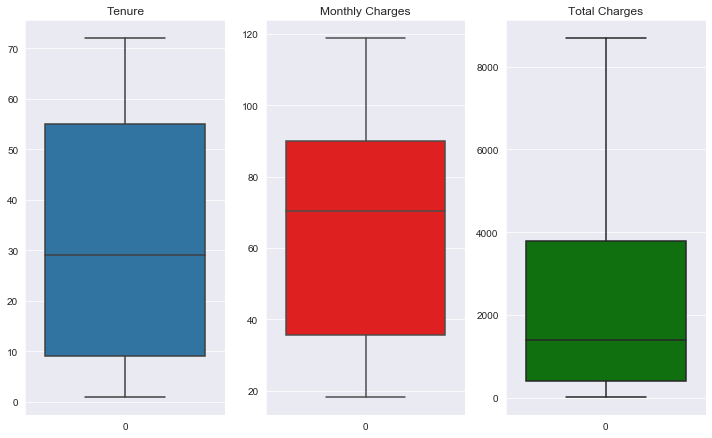

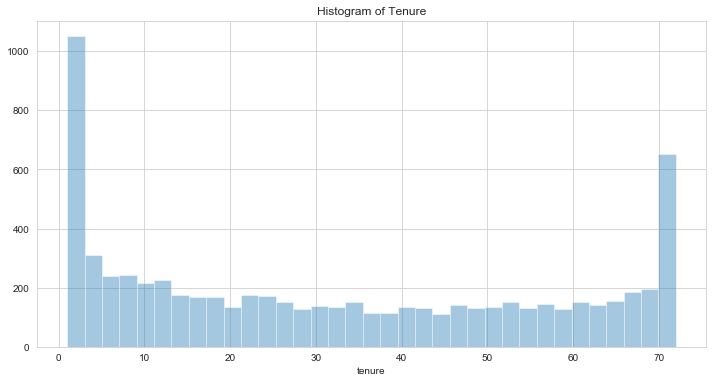

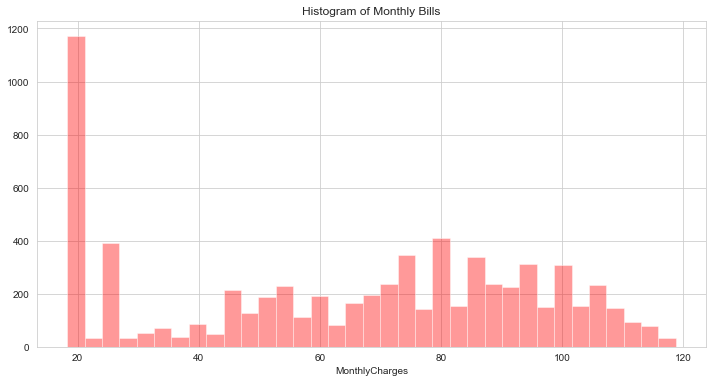

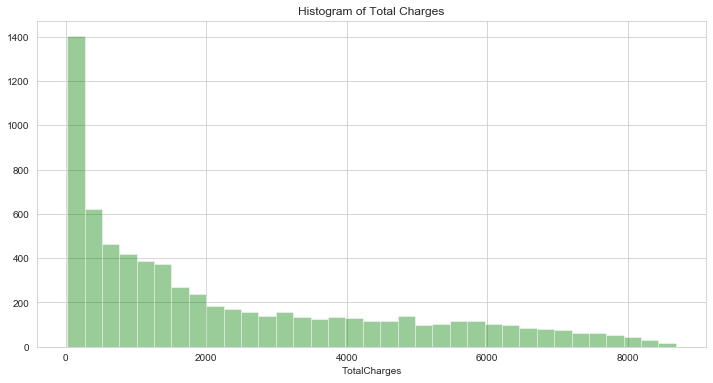

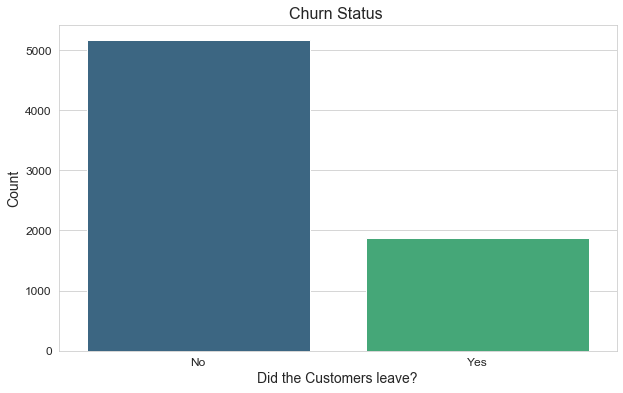

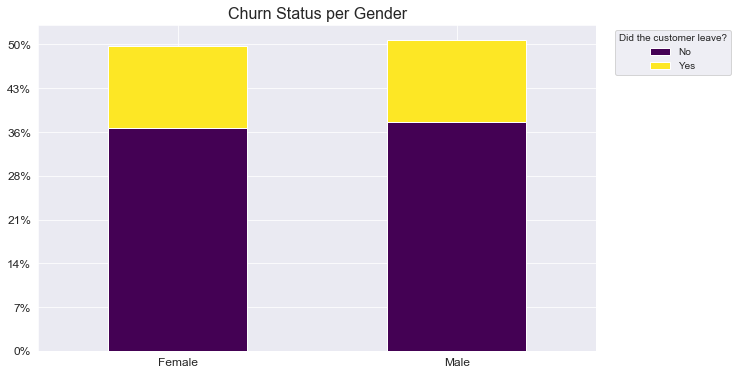

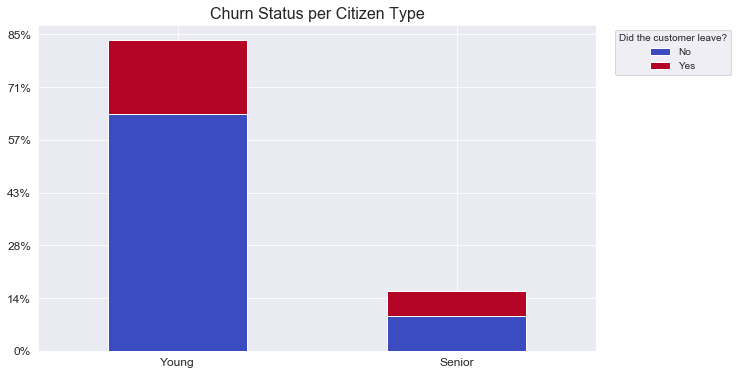

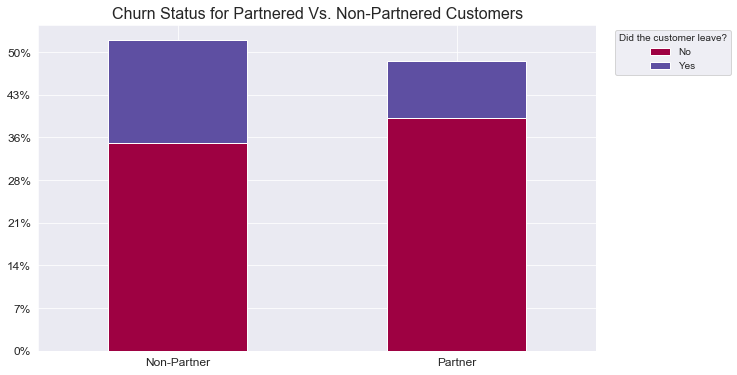

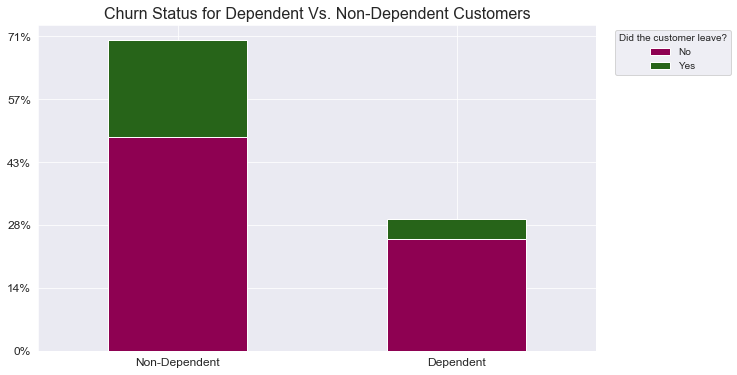

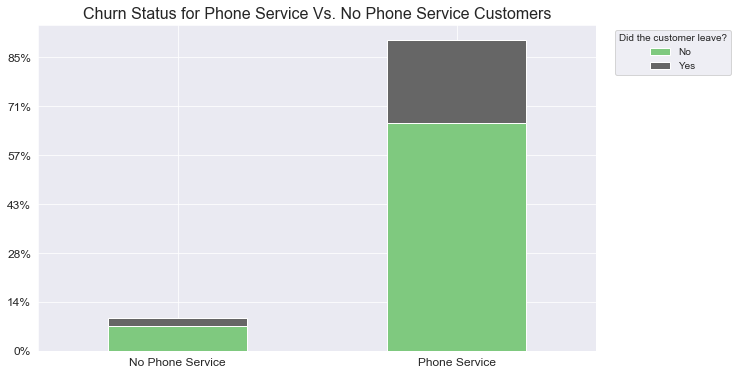

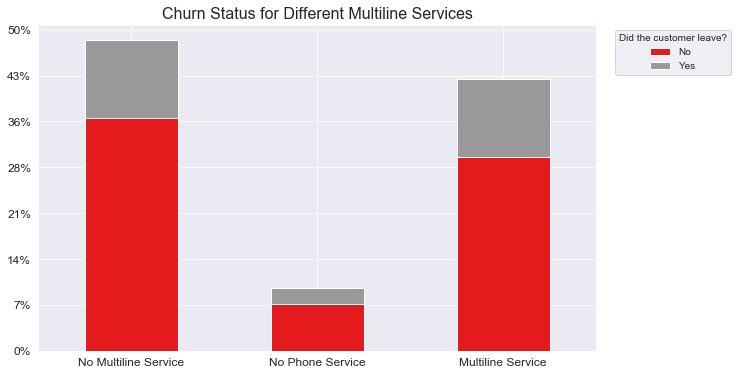

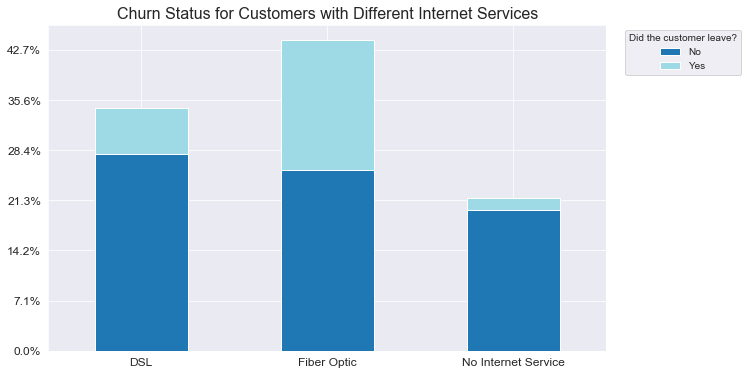

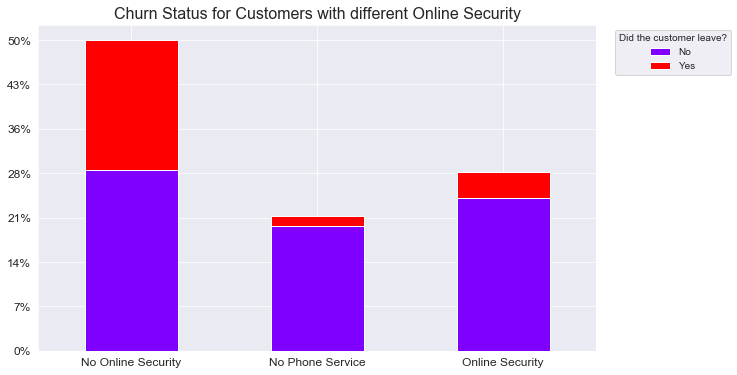

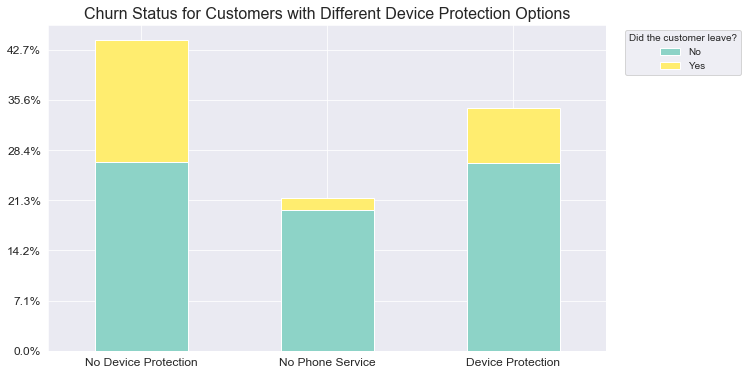

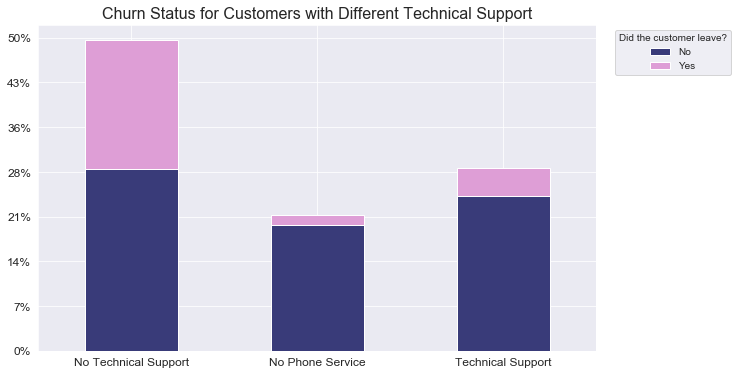

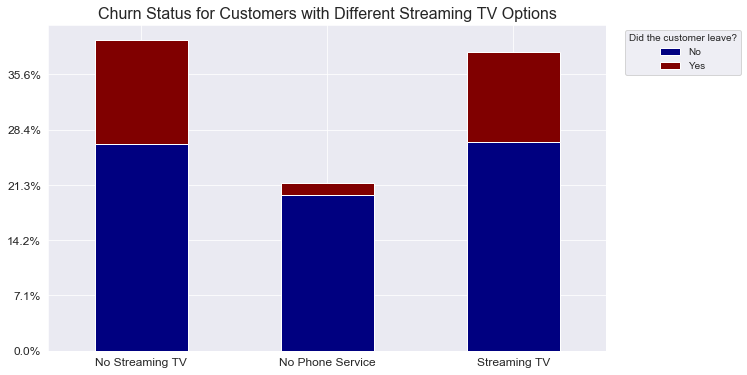

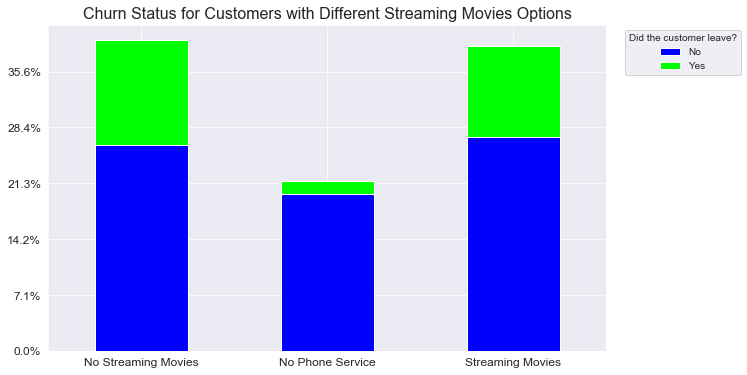

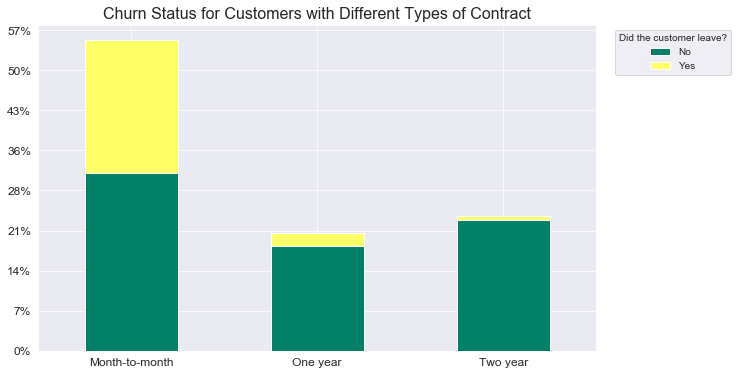

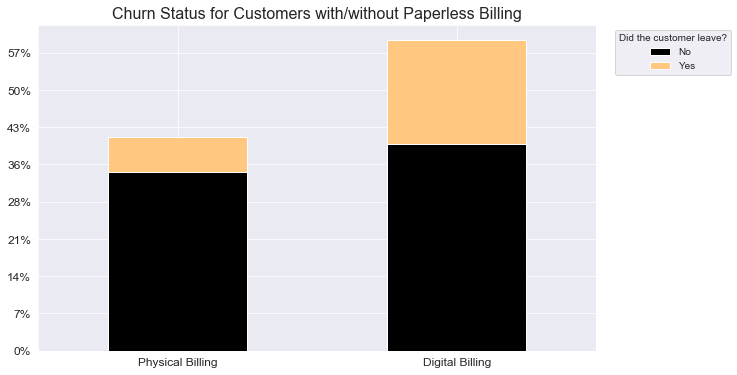

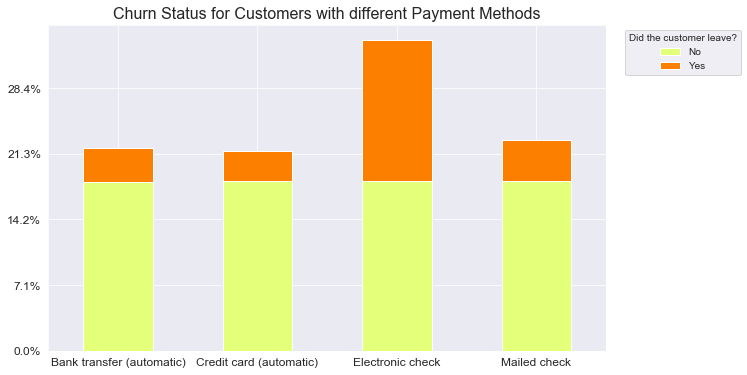

No     5163
Yes    1869
Name: Churn, dtype: int64

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,34,56.95,1889.50,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.85,108.15,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,45,42.30,1840.75,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


[[931 649]
 [ 84 446]]
Accuracy: 0.6526066350710901
              precision    recall  f1-score   support

           0       0.92      0.59      0.72      1580
           1       0.41      0.84      0.55       530

    accuracy                           0.65      2110
   macro avg       0.66      0.72      0.63      2110
weighted avg       0.79      0.65      0.68      2110

Confusion Matrix


Predicted,0,1,All
True,,,
0,931,649,1580
1,84,446,530
All,1015,1095,2110


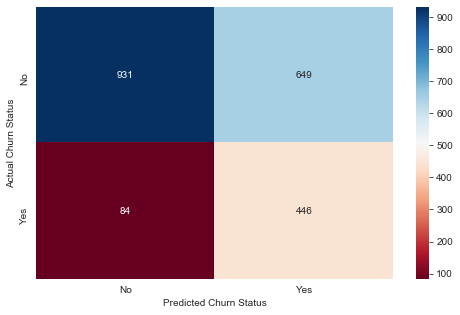

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Classification Metrics for Decision Tree are as follows:
0.7241706161137441


[[1245  335]
 [ 247  283]]


              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1580
           1       0.46      0.53      0.49       530

    accuracy                           0.72      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.74      0.72      0.73      2110



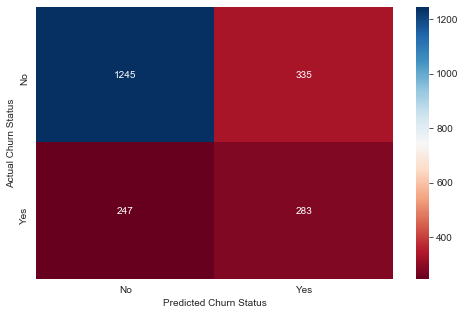

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Classification Metrics of Random Forest are as follows:
0.7933649289099526


[[1407  173]
 [ 263  267]]


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1580
           1       0.61      0.50      0.55       530

    accuracy                           0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.79      2110



Predicted Churn Status,No,Yes
Actual Churn Status,,
No,1407,173
Yes,263,267


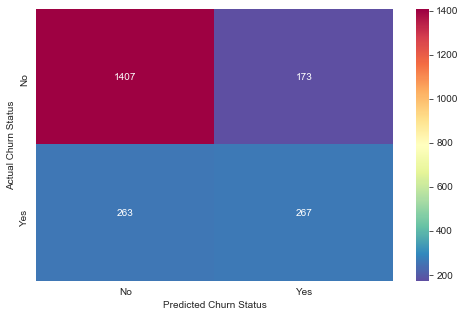

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.53      0.58       530

    accuracy                           0.81      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110

[[1419  161]
 [ 247  283]]
0.8066350710900474


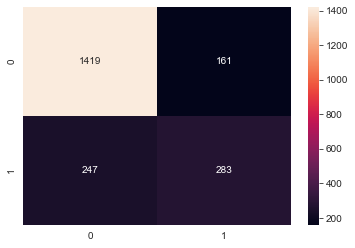

In [45]:
if __name__ == "__main__":


    data = data_reading()

    if data is not None:
        cleaned_data = data_cleaning(data)
        stat_analysis(cleaned_data)
        show_plots(cleaned_data)
        churn_analysis_plots(cleaned_data)

        data_with_dummies = insert_dummies(cleaned_data)

        from sklearn.model_selection import train_test_split

        X = data_with_dummies.drop(['customerID', 'Churn_Yes'], axis=1)
        y = data_with_dummies['Churn_Yes']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


        naive_bayes_model(data_with_dummies)

        decision_tree_model(data_with_dummies)

        random_forest_model(data_with_dummies)

        logistic_regression_model(data_with_dummies)
